# Partie 1: Exploration et Préparation des Données

# 1.1 Importation et Analyse Initiale

In [355]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [356]:
# Charger le dataset 
df = pd.read_csv("train.csv")
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [357]:
# faire une copie de la dataset
backup = df.copy()

In [358]:
# examiner la structure :
df.shape

(209673, 8)

In [359]:
#Identifier les variables clés
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


1-trip_duration : Durée du trajet

Temps total de la course (probablement en minutes ou secondes)
2-distance_traveled : Distance parcourue

Distance totale du trajet (probablement en kilomètres ou miles)
3-num_of_passengers : Nombre de passagers

Combien de personnes ont pris le taxi pour cette course
4-fare : Tarif de base

Le prix de base de la course (sans pourboire ni frais supplémentaires)
5-tip : Pourboire

Le montant du pourboire laissé par le client
6-miscellaneous_fees : Frais divers

Frais supplémentaires (péages, frais d'aéroport, etc.)
7-total_fare : Tarif total

Le montant total payé = fare + tip + miscellaneous_fees
8-surge_applied : Tarification dynamique appliquée

Indique si un supplément pour forte demande a été appliqué (1 = oui, 0 = non)
Aussi appelé "prix de pointe" ou "surge pricing"

In [360]:
# Analyser les types de variables (numériques, catégorielles, temporelles)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [361]:
df["surge_applied"].unique()

array([0, 1], dtype=int64)

In [362]:
# Vérifier les valeurs aberrantes et manquantes
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

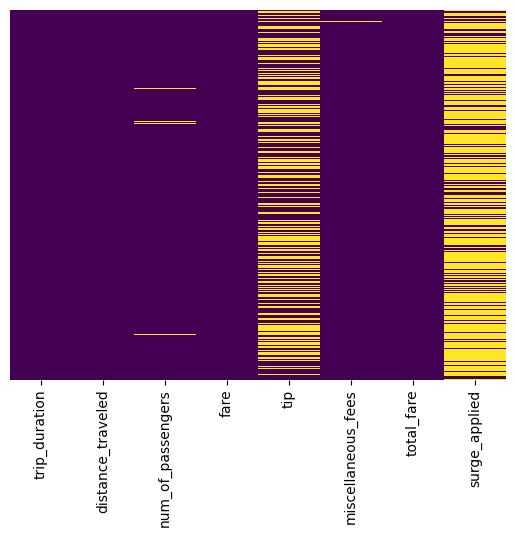

In [363]:
sns.heatmap(df==0,yticklabels=False,cbar=False,cmap='viridis')
plt.show()

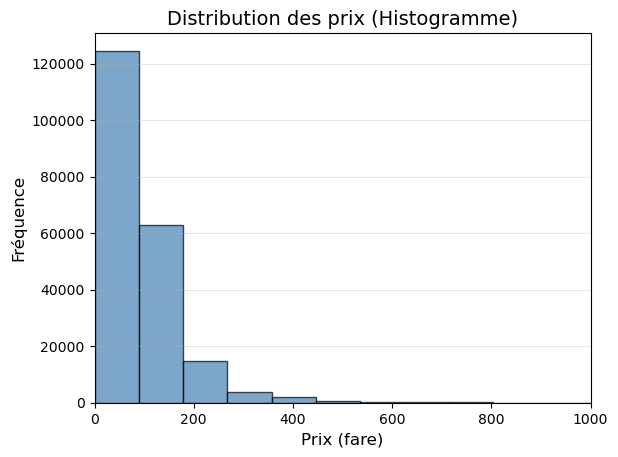

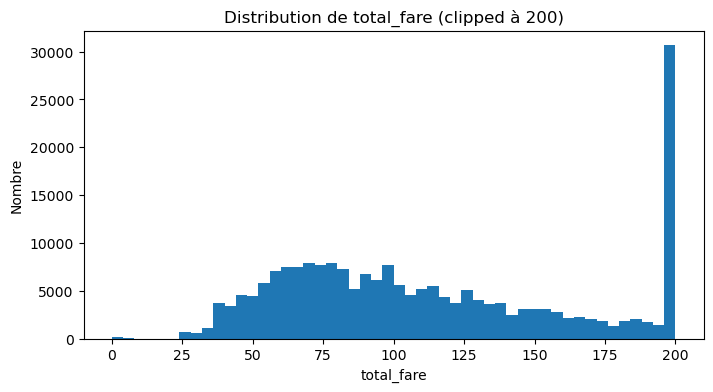

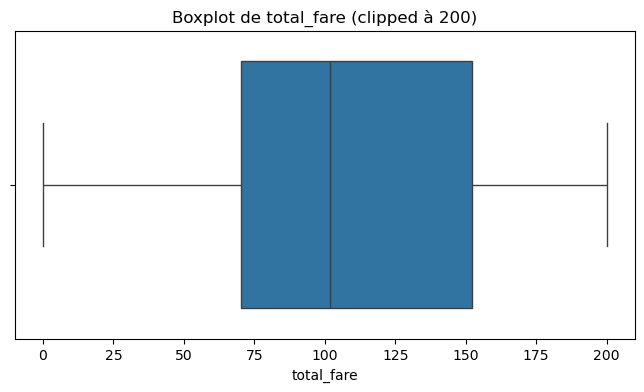

Statistiques descriptives des prix:
count    209673.000000
mean         99.623431
std          85.602702
min           0.000000
25%          52.500000
50%          75.000000
75%         116.250000
max        4466.250000
Name: fare, dtype: float64

Étendue: 4466.25
Variance: 7327.82


In [364]:
# Étudier la distribution des prix (histogramme, boxplot)

# Histogramme
plt.hist(df['fare'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribution des prix (Histogramme)', fontsize=14)
plt.xlabel('Prix (fare)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xlim(0, 1000)  # Limiter l'axe des x de 0 à 1000
plt.grid(axis='y', alpha=0.3)


plt.figure(figsize=(8,4))
plt.hist(df['total_fare'].clip(0,200), bins=50)
plt.title('Distribution de total_fare (clipped à 200)')
plt.xlabel('total_fare'); plt.ylabel('Nombre')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['total_fare'].clip(0,200))
plt.title('Boxplot de total_fare (clipped à 200)')
plt.show()

# Statistiques descriptives
print("Statistiques descriptives des prix:")
print(df['fare'].describe())
print(f"\nÉtendue: {df['fare'].max() - df['fare'].min():.2f}")
print(f"Variance: {df['fare'].var():.2f}")

In [322]:
print("min: ",df['trip_duration'].min(),"\n")
print("max: ",df['trip_duration'].max(),"|| +1400h !!!\n")
print("moyenne: ",df['trip_duration'].mean(),"|| 20h")

min:  0.0 

max:  86387.0 || +1400h !!!

moyenne:  1173.181477824994 || 20h


In [323]:
# Analyser et supprimer les outliers de trip_duration
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure pour qu'elle ne soit pas négative
lower_bound = max(lower_bound, 120)  # Minimum de 2 minutes (120 secondes)

print(f"Q1: {Q1} secondes ({Q1/60:.2f} minutes)")
print(f"Q3: {Q3} secondes ({Q3/60:.2f} minutes)")
print(f"Limite supérieure: {upper_bound} secondes ({upper_bound/60:.2f} minutes)")
print(f"Limite inférieure: {lower_bound} secondes ({lower_bound/60:.2f} minutes)")

# Nombre d'outliers
outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['trip_duration'].min()} sec ({df['trip_duration'].min()/60:.2f} min)")
print(f"Max: {df['trip_duration'].max()} sec ({df['trip_duration'].max()/60:.2f} min)")
print(f"Mean: {df['trip_duration'].mean():.2f} sec ({df['trip_duration'].mean()/60:.2f} min)")

Q1: 446.0 secondes (7.43 minutes)
Q3: 1098.0 secondes (18.30 minutes)
Limite supérieure: 2076.0 secondes (34.60 minutes)
Limite inférieure: 120 secondes (2.00 minutes)

Outliers détectés: 16334 (7.79%)
Avant: 209673 lignes
Après: 193339 lignes

Nouvelles stats:
Min: 120.0 sec (2.00 min)
Max: 2076.0 sec (34.60 min)
Mean: 775.59 sec (12.93 min)


In [324]:
print("min: ",df['distance_traveled'].min(),"km\n")
print("max: ",df['distance_traveled'].max(),"km !!!\n")
print("moyenne: ",df['distance_traveled'].mean(),"km")

min:  0.02 km

max:  57283.91 km !!!

moyenne:  4.51531036159285 km


In [325]:
# Analyser et supprimer les outliers de distance_traveled
Q1 = df['distance_traveled'].quantile(0.25)
Q3 = df['distance_traveled'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure pour qu'elle ne soit pas négative
lower_bound = max(lower_bound, 0.1)  # Minimum 0.1 km (100 mètres)

print(f"Q1: {Q1} km")
print(f"Q3: {Q3} km")
print(f"Limite supérieure: {upper_bound} km")
print(f"Limite inférieure: {lower_bound} km")

# Nombre d'outliers
outliers = df[(df['distance_traveled'] < lower_bound) | (df['distance_traveled'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['distance_traveled'] >= lower_bound) & (df['distance_traveled'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['distance_traveled'].min()} km")
print(f"Max: {df['distance_traveled'].max()} km")
print(f"Mean: {df['distance_traveled'].mean():.2f} km")

Q1: 1.95 km
Q3: 5.2 km
Limite supérieure: 10.075 km
Limite inférieure: 0.1 km

Outliers détectés: 14277 (7.38%)
Avant: 193339 lignes
Après: 179062 lignes

Nouvelles stats:
Min: 0.1 km
Max: 10.07 km
Mean: 3.47 km


In [326]:
# Analyser et supprimer les outliers de miscellaneous_fees
Q1 = df['miscellaneous_fees'].quantile(0.25)
Q3 = df['miscellaneous_fees'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum 0)
lower_bound = max(lower_bound, 0.0)  # Minimum 0.00 $ (pas de frais négatifs)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['miscellaneous_fees'] < lower_bound) | (df['miscellaneous_fees'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['miscellaneous_fees'] >= lower_bound) & (df['miscellaneous_fees'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['miscellaneous_fees'].min()} $")
print(f"Max: {df['miscellaneous_fees'].max()} $")
print(f"Mean: {df['miscellaneous_fees'].mean():.2f} $")
print(f"Median: {df['miscellaneous_fees'].median():.2f} $")

Q1: 6.0 $
Q3: 26.200000000000003 $
IQR: 20.200000000000003 $
Limite supérieure: 56.50000000000001 $
Limite inférieure: 0.0 $

Outliers détectés: 387 (0.22%)
Avant: 179062 lignes
Après: 178675 lignes

Nouvelles stats:
Min: 0.0 $
Max: 55.875 $
Mean: 13.85 $
Median: 9.75 $


In [327]:
# Analyser et supprimer les outliers de total_fare
Q1 = df['total_fare'].quantile(0.25)
Q3 = df['total_fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum NYC)
lower_bound = max(lower_bound, 3.0)  # Minimum 3.00 $ (NYC)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['total_fare'] < lower_bound) | (df['total_fare'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['total_fare'] >= lower_bound) & (df['total_fare'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['total_fare'].min()} $")
print(f"Max: {df['total_fare'].max()} $")
print(f"Mean: {df['total_fare'].mean():.2f} $")
print(f"Median: {df['total_fare'].median():.2f} $")

Q1: 69.75 $
Q3: 129.75 $
IQR: 60.0 $
Limite supérieure: 219.75 $
Limite inférieure: 3.0 $

Outliers détectés: 3180 (1.78%)
Avant: 178675 lignes
Après: 175495 lignes

Nouvelles stats:
Min: 3.0 $
Max: 219.75 $
Mean: 100.73 $
Median: 92.25 $


In [330]:
# frais divers
df["miscellaneous_fees"][df['miscellaneous_fees']<0]

Series([], Name: miscellaneous_fees, dtype: float64)

In [331]:
# supprimer les courses avec 0 passager ou plus que 3
df.drop(df[(df['num_of_passengers'] == 0) | (df['num_of_passengers'] > 3)].index, inplace=True)

In [332]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [333]:
# Soustraire tip de total_fare
df['total_fare'] = df['total_fare'] - df['tip']

In [334]:
# suppression de la colonne tip
df.drop('tip', axis=1, inplace=True)

In [335]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [336]:
# Vérifier la cohérence de total_fare
df['calculated_total'] = df['fare'] + df['miscellaneous_fees']

# Comparer avec total_fare (avec une tolérance pour les erreurs d'arrondi)
df['difference'] = abs(df['total_fare'] - df['calculated_total'])

# Afficher les statistiques
print("Vérification de la cohérence de total_fare:")
print(f"Nombre de lignes avec différence > 0.01: {len(df[df['difference'] > 0.01])}")
print(f"Différence maximale: {df['difference'].max():.2f}")
print(f"Différence moyenne: {df['difference'].mean():.4f}")

# Afficher les lignes incohérentes
incoherent = df[df['difference'] > 0.01]
if len(incoherent) > 0:
    print(f"\n{len(incoherent)} lignes incohérentes trouvées:")
    print(incoherent[['fare', 'tip', 'miscellaneous_fees', 'total_fare', 'calculated_total', 'difference']].head(10))
else:
    print("\n✅ Toutes les lignes sont cohérentes!")

# Nettoyer les colonnes temporaires
df.drop(['calculated_total', 'difference'], axis=1, inplace=True)

Vérification de la cohérence de total_fare:
Nombre de lignes avec différence > 0.01: 0
Différence maximale: 0.00
Différence moyenne: 0.0000

✅ Toutes les lignes sont cohérentes!


1.2 Nettoyage et Feature Engineering

In [338]:
#Supprimer les courses avec des prix négatifs ou extrêmes

# Afficher le nombre de lignes après suppression
print(f"\nNombre de lignes après suppression: {len(df)}")

# Analyser et supprimer les outliers de fare
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum NYC)
lower_bound = max(lower_bound, 3.0)  # Minimum 3.00 $ (NYC)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
print(f"Après: {len(df)} lignes")
print(f"Nombre de courses avec fare > 211.875$: {len(df[df['fare'] > 211.875])}")
print(f"Nombre de courses avec fare < 0$: {len(df[df['fare'] <= 0])}")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['fare'].min()} $")
print(f"Max: {df['fare'].max()} $")
print(f"Mean: {df['fare'].mean():.2f} $")
print(f"Median: {df['fare'].median():.2f} $")




Nombre de lignes après suppression: 167215
Q1: 52.5 $
Q3: 97.5 $
IQR: 45.0 $
Limite supérieure: 165.0 $
Limite inférieure: 3.0 $

Outliers détectés: 1126 (0.67%)
Avant: 167215 lignes
Après: 166089 lignes
Nombre de courses avec fare > 211.875$: 0
Nombre de courses avec fare < 0$: 0

Nouvelles stats:
Min: 15.0 $
Max: 165.0 $
Mean: 75.93 $
Median: 71.25 $


In [339]:
# gérer les valeurs manquantes
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

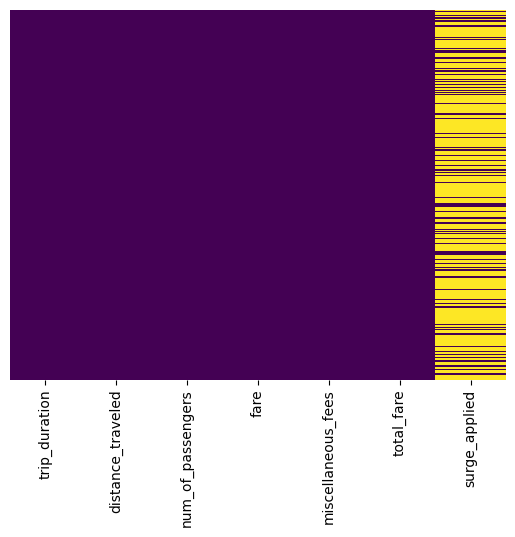

In [340]:
# dataset clean
sns.heatmap(df==0,yticklabels=False,cbar=False,cmap='viridis')
plt.show()

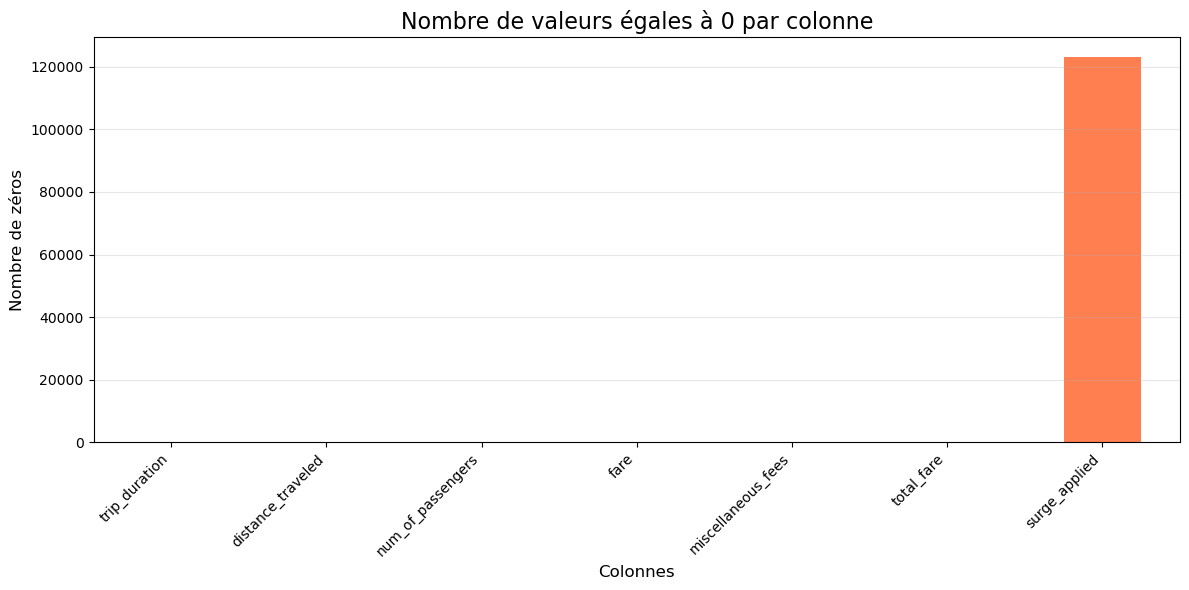


Pourcentage de zéros par colonne:
surge_applied         74.22
miscellaneous_fees     0.02
trip_duration          0.00
distance_traveled      0.00
num_of_passengers      0.00
fare                   0.00
total_fare             0.00
dtype: float64


In [341]:
# Compter et visualiser les zéros par colonne
zero_counts = (df == 0).sum()

plt.figure(figsize=(12, 6))
zero_counts.plot(kind='bar', color='coral')
plt.title('Nombre de valeurs égales à 0 par colonne', fontsize=16)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Nombre de zéros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher les pourcentages
print("\nPourcentage de zéros par colonne:")
print(((df == 0).sum() / len(df) * 100).round(2).sort_values(ascending=False))

In [ ]:
# standariser les features numériques